In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn
import sklearn.preprocessing
from sklearn import metrics
from sklearn.linear_model import LinearRegression
matplotlib.rcParams['font.family']='SimHei'

In [3]:
wb = pd.read_excel('..\\datasets\\figure.xlsx',sheetname='hourglass')
wb.dropna(inplace=True,axis=1)
wb.head()

,id,height,chest,lower_chest,waist,shoulder,middle_butt
0,1,163,83,70,70,74,88
1,2,158,81,68,68,72,86
2,3,165,85,71,70,75,89
3,4,170,88,73,73,78,92
4,5,164,84,71,70,75,89


In [4]:
apple_before = pd.read_excel('..\\datasets\\figure.xlsx',sheetname='apple_before')
apple_before.dropna(inplace=True,axis=1)
apple_before.head()

,id,height,chest,lower_chest,waist,shoulder,middle_butt
0,1,154,82,75,76,79,83
1,2,161,88,78,79,84,87
2,3,157,84,76,78,79,85
3,4,165,90,81,80,84,89
4,5,173,96,87,85,89,94


In [71]:
apple_before.height

0     154
1     161
2     157
3     165
4     173
5     179
6     153
7     160
8     156
9     163
10    170
11    170
Name: height, dtype: int64

In [5]:
sort_height = wb.sort_values('height').copy()

In [27]:
sort_chest = wb.sort_values('chest').copy()
sort_lower_chest = wb.sort_values('lower_chest').copy()
sort_waist = wb.sort_values('waist').copy()
sort_shoulder = wb.sort_values('shoulder').copy()
sort_middle_butt = wb.sort_values('middle_butt').copy()

In [ ]:
height

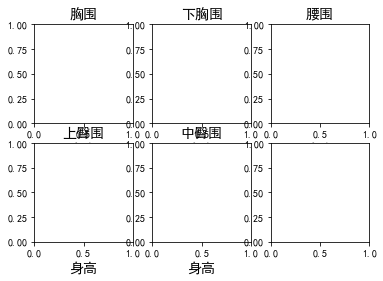

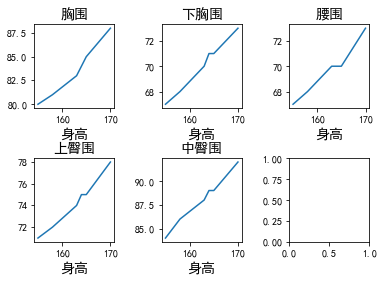

In [7]:
fig, axes = plt.subplots(2,3)
ax0,ax1,ax2,ax3,ax4,ax5 = axes.ravel()
ax0.set_title('胸围', fontproperties='SimHei', fontsize=14)
ax1.set_title('下胸围', fontproperties='SimHei', fontsize=14)
ax2.set_title('腰围', fontproperties='SimHei', fontsize=14)
ax3.set_title('上臀围', fontproperties='SimHei', fontsize=14)
ax4.set_title('中臀围', fontproperties='SimHei', fontsize=14)

ax0.set_xlabel('身高', fontsize=14)
ax1.set_xlabel('身高', fontsize=14)
ax2.set_xlabel('身高', fontsize=14)
ax3.set_xlabel('身高', fontsize=14)
ax4.set_xlabel('身高', fontsize=14)

ax0.plot(sort_height.height,sort_height.chest)
ax1.plot(sort_height.height,sort_height.lower_chest)
ax2.plot(sort_height.height,sort_height.waist)
ax3.plot(sort_height.height,sort_height.shoulder)
ax4.plot(sort_height.height,sort_height.middle_butt)
fig.subplots_adjust(hspace=0.6)
fig.subplots_adjust(wspace=0.6)
# plt.title('Male Heights')
plt.show()

In [10]:
# 一元线性回归
length = len(sort_height.chest)
datasets_X = np.array(sort_height.height).reshape([length,1])
datasets_Y = np.array(sort_height.chest)

linreg = LinearRegression()
linreg.fit(datasets_X,datasets_Y )

X_pred = np.array([170,160,150]).reshape([-1,1])
y_pred = linreg.predict(X_pred)
print("回归系数：",linreg.coef_)
print("回归截距：",linreg.intercept_ )
print("回归检验：", y_pred)

回归系数： [ 0.5335689]
回归截距： -3.20494699647
回归检验： [ 87.50176678  82.16607774  76.83038869]


In [66]:
# 一元线性回归函数
def figure_linear(x,y,name):
    length = len(x)
    datasets_X = np.array(x).reshape([length,1])
    datasets_Y = np.array(y)

    linreg = LinearRegression()
    linreg.fit(datasets_X,datasets_Y )

    y_pred = linreg.predict(75)
    print(name,"回归系数：",linreg.coef_," 回归截距：",linreg.intercept_,"回归检验：", y_pred)
    
    minX = min(datasets_X)
    maxX = max(datasets_X)
    X = np.arange(minX,maxX).reshape([-1,1])

    plt.scatter(datasets_X, datasets_Y, color = 'red')
    plt.plot(X, linear.predict(X), color = 'blue')

In [68]:
 # 一元线性回归并作图函数
def figure_linear(x,y,name):
    length = len(x)
    datasets_X = np.array(x).reshape([length,1])
    datasets_Y = np.array(y)

    linreg = LinearRegression()
    linreg.fit(datasets_X,datasets_Y )

    y_pred = linreg.predict(75)
    print(name,"回归系数：",linreg.coef_," 回归截距：",linreg.intercept_,"回归检验：", y_pred)
    minX = min(datasets_X)
    maxX = max(datasets_X)
    X = np.arange(minX,maxX).reshape([-1,1])

    # 图像中显示
    plt.title('胸围', fontproperties='SimHei', fontsize=14)
    plt.xlabel('身高', fontsize=14)
    plt.plot(datasets_X, datasets_Y, color = 'red')
    plt.plot(X, linreg.predict(X), color = 'blue')

胸围 回归系数： [ 0.5335689]  回归截距： -3.20494699647 回归检验： [ 36.81272085]


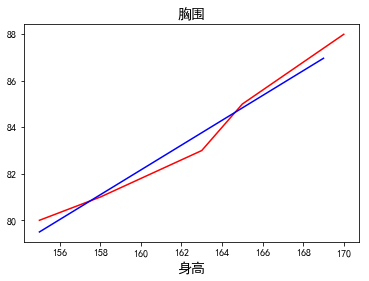

In [69]:
figure_linear(sort_chest.height,sort_chest.chest,"胸围")

In [ ]:
# 一元线性回归并预测函数函数
def figure_linear(x,y,name):
    length = len(x)
    datasets_X = np.array(x).reshape([length,1])
    datasets_Y = np.array(y)

    linreg = LinearRegression()
    linreg.fit(datasets_X,datasets_Y )

    y_pred = linreg.predict(75)
    print(name,"回归系数：",linreg.coef_," 回归截距：",linreg.intercept_,"回归检验：", y_pred)

In [17]:
# 预测类
class Predict():
    def __init__(self):
        self.fetures = ['chest', 'lower_chest', 'waist', 'shoulder','middle_butt']
        self.names = ["胸围", "下胸围", "腰围", "上臀围", "中臀围"]
        self.coef = dict()
        self.delta = dict()
    def figure_linear(self,x,y,feture,name):
        self.fetures.append(feture)
        length = len(x)
        datasets_X = np.array(x).reshape([length,1])
        datasets_Y = np.array(y)

        linreg = LinearRegression()
        linreg.fit(datasets_X,datasets_Y )
        
        self.coef[feture] = linreg

        #y_pred = linreg.predict(75)
        print(name,"回归系数：",linreg.coef_," 回归截距：",linreg.intercept_)
    def single_estimate(self,x,y):
        #
        pass
    """
    根据工作表和标准身材计算出本表中所有人的身材得分
    """
    def get_score(self,wb):
        heights = np.array(wb.height).reshape([-1,1])
        self.X_pred_chest = elf.coef['chest'].predict(heights)
        self.X_pred_lower_chest = elf.coef['lower_chest'].predict(heights)
        self.X_pred_waist = elf.coef['waist'].predict(heights)
        self.X_pred_shoulder = elf.coef['shoulder'].predict(heights)
        self.X_pred_middle_butt = elf.coef['middle_butt'].predict(heights)
        delta_chest = np.abs(X_pred_chest - wb.chest)
        return delta_chest    
        #standard = wb.d
    """
    根据锻炼之前的得分和之后的得分计算出最后的身材成绩
    """
    def get_points(self,bf,af):
        pass
    """
    主评价函数，用于生成针对苹果型、梨形、或报纸型身材
    在锻炼前后的比分变化，每个人都要算，最后得到百分制
    的得分
    """
    def estimate(self,before,after):
        before_score = score(before)
        after_score = score(after)
        points = get_points(before_score,after_score)
        return points
    """
    主生成模型函数，利用沙漏型身材来生成最佳的模型，以
    身高为因变量来实现对各身材指标的预测
    """
    def create_model(self,wb):
        sort_wb = wb.sort_values('height')
        for i in range(5):
            feture = self.fetures[i]
            x = sort_wb['height']
            y = sort_wb[feture]
            name = self.names[i]
            self.figure_linear(x,y,feture,name)

In [18]:
test_pred = Predict()
test_pred.create_model(wb)

胸围 回归系数： [ 0.5335689]  回归截距： -3.20494699647
下胸围 回归系数： [ 0.40989399]  回归截距： 3.39222614841
腰围 回归系数： [ 0.38162544]  回归截距： 7.65253239105
上臀围 回归系数： [ 0.46289753]  回归截距： -1.05418138987
中臀围 回归系数： [ 0.51590106]  回归截距： 4.16607773852


In [19]:
test_pred.coef

{'chest': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 'lower_chest': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 'middle_butt': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 'shoulder': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 'waist': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)}

In [73]:
len(wb.columns)

7

In [50]:
figure_linear(sort_chest.height,sort_chest.chest,"胸围")
figure_linear(sort_lower_chest.height,sort_lower_chest.lower_chest,"下胸围")
figure_linear(sort_waist.height,sort_waist.waist,"腰围")
figure_linear(sort_shoulder.height,sort_shoulder.shoulder,"上臀围")
figure_linear(sort_middle_butt.height,sort_middle_butt.middle_butt,"中臀围")

胸围 回归系数： [ 0.5335689]  回归截距： -3.20494699647 回归检验： [ 36.81272085]
下胸围 回归系数： [ 0.40989399]  回归截距： 3.39222614841 回归检验： [ 34.13427562]
腰围 回归系数： [ 0.38162544]  回归截距： 7.65253239105 回归检验： [ 36.27444052]
上臀围 回归系数： [ 0.46289753]  回归截距： -1.05418138987 回归检验： [ 33.6631331]
中臀围 回归系数： [ 0.51590106]  回归截距： 4.16607773852 回归检验： [ 42.85865724]


In [56]:
testdic = dict()
testdic['xiong'] = [1,3]

In [57]:
testdic

{'xiong': [1, 3]}